In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [186]:
two_way_section_data_df = pd.read_pickle('2_way_section_data_df.pickle')

In [187]:
two_way_section_data_df = gpd.GeoDataFrame(two_way_section_data_df)

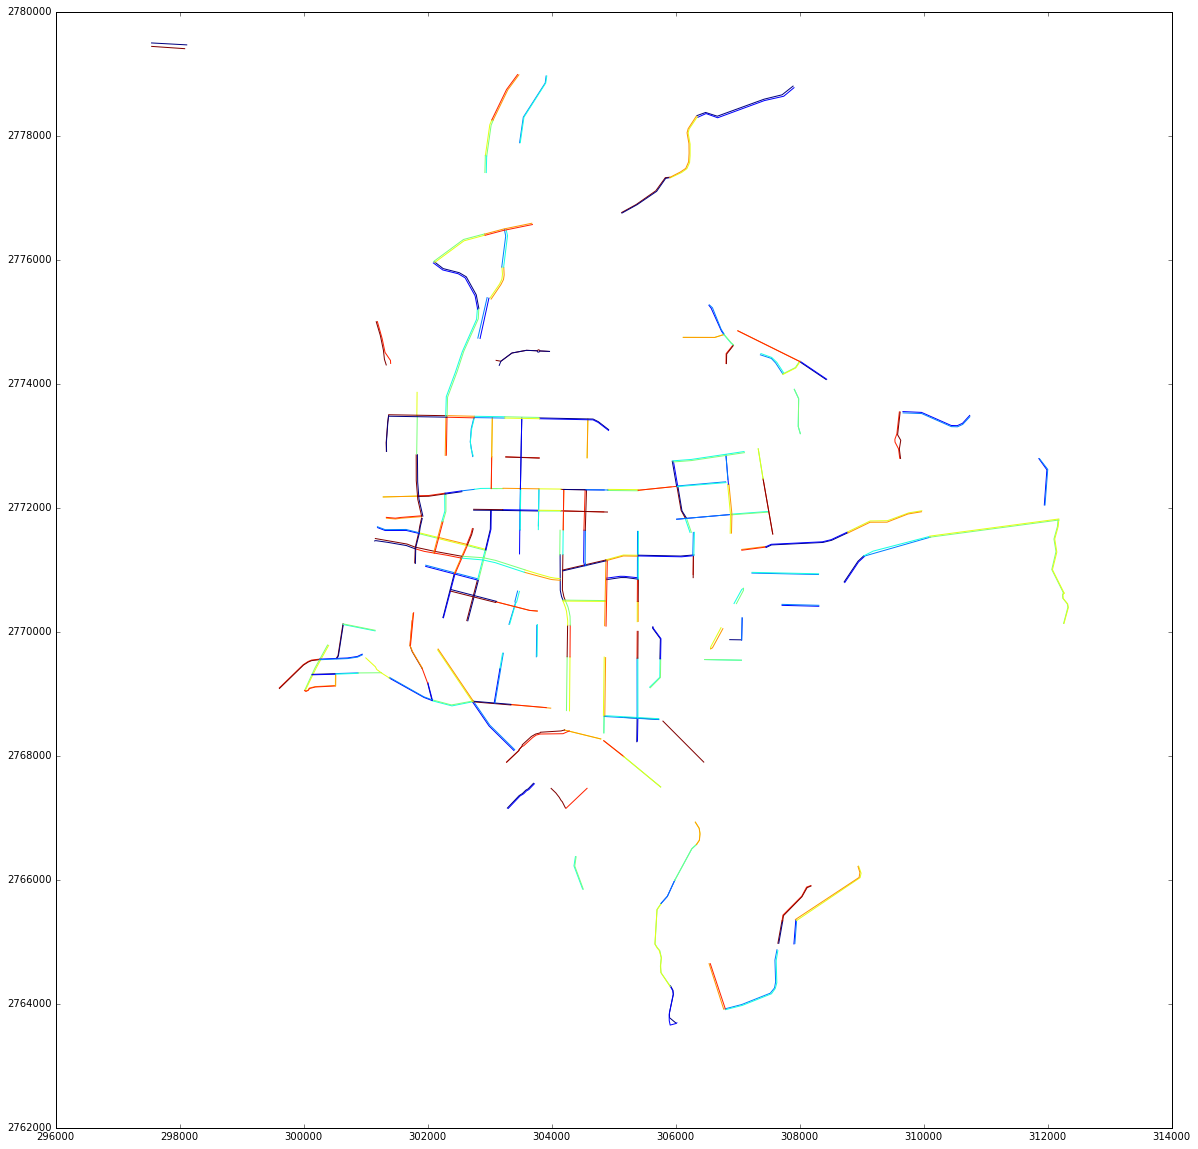

In [188]:
two_way_section_data_df.plot()

In [189]:
car_flow = pd.read_pickle('car_flow.pickle')

In [190]:
totalVol = car_flow.groupby(by='SectionId', as_index=False)['TotalVol'].sum()

In [191]:
two_way_section_data_df_ = pd.merge(two_way_section_data_df, totalVol, left_on='code', right_on='SectionId')

In [228]:
two_way_section_data_df_.head()

,code,name,start,end,geometry,from,to,set,count,offset,problem,SectionId,TotalVol
0,Z1CPB00,辛亥路,POINT (305169.0000001893 2763898.999857932),POINT (305083.000000146 2764498.999857901),LINESTRING (305997.7734111675 2763692.95661411...,木新路,光輝路,"(光輝路, 木新路)",2,"-2.8376657300218815, -19.797667872874808",False,Z1CPB00,102688.0
1,Z1CPB40,辛亥路,POINT (305080.0000001973 2764491.999857898),POINT (305188.0000001881 2763898.999857933),LINESTRING (305909.0219076396 2764286.61923102...,光輝路,木新路,"(光輝路, 木新路)",2,"3.583548463101395, 19.67633554330185",False,Z1CPB40,76348.0
2,Z1CRT60,木新路,POINT (306802.0000001706 2765077.999857874),POINT (305963.0000001747 2764123.999857915),LINESTRING (307631.4124046533 2764872.08353104...,木柵路,興隆路,"(木柵路, 興隆路)",2,"-13.207943832369725, 15.018329458397378",False,Z1CRT60,75902.0
3,Z27SN20,木新路,POINT (305972.0000002043 2764110.99985792),POINT (306816.0000001427 2765062.999857876),LINESTRING (306801.5482483353 2763905.64614986...,興隆路,木柵路,"(木柵路, 興隆路)",2,"13.267750866768392, -14.965519935417099",False,Z27SN20,45796.5
4,Z1HPC00,辛亥路,POINT (305080.0000001612 2764492.999857899),POINT (304841.000000191 2765173.99985787),LINESTRING (305761.1572929116 2765617.08387529...,光輝路,懷恩隧道,"(光輝路, 懷恩隧道)",2,"-6.623052865854653, -18.871543941503422",False,Z1HPC00,19579.0


In [229]:
group = two_way_section_data_df_.groupby(by='set', as_index=False)

test = pd.concat([group[['geometry']].first(), group[['TotalVol']].sum()], axis=1)

In [230]:
test = gpd.GeoDataFrame(test)

In [231]:
test['TotalVol'].describe()

count    1.290000e+02
mean     2.503626e+05
std      5.368051e+05
min      7.085500e+03
25%      9.138550e+04
50%      1.475485e+05
75%      2.302680e+05
max      5.263714e+06
Name: TotalVol, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


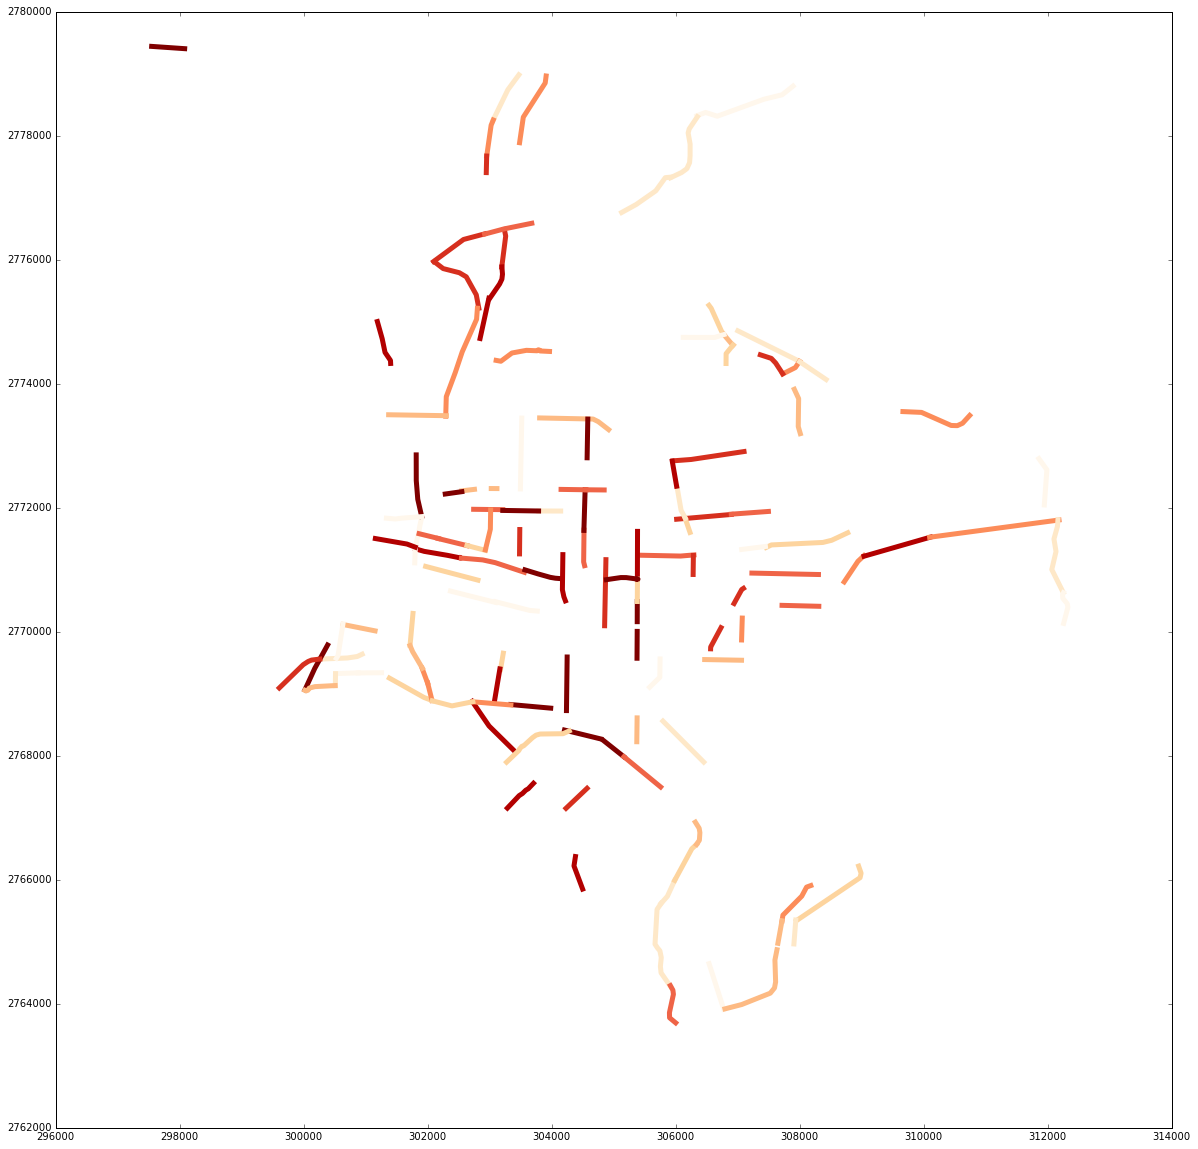

In [232]:
test.plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5)

In [236]:
two_way_section_data_df[(two_way_section_data_df['name']=='市民大道')].head(2)

,code,name,start,end,geometry,from,to,set,count,offset,problem
221,ZJGPQ20,市民大道,POINT (304052.0000001137 2771046.999857604),POINT (304560.0000001522 2771054.999857605),LINESTRING (304880.9007219518 2770840.97305164...,復興南北路,敦化南北路,"(復興南北路, 敦化南北路)",2,"19.997520456225747, -0.31492158203724424",False
222,ZK6NY60,市民大道,POINT (305425.0000001479 2771111.999857602),POINT (304566.0000001246 2771081.999857598),LINESTRING (305387.9117775204 2770871.97683800...,敦化南北路,復興南北路,"(復興南北路, 敦化南北路)",2,"-19.987814057651285, 0.6980610265282318",False


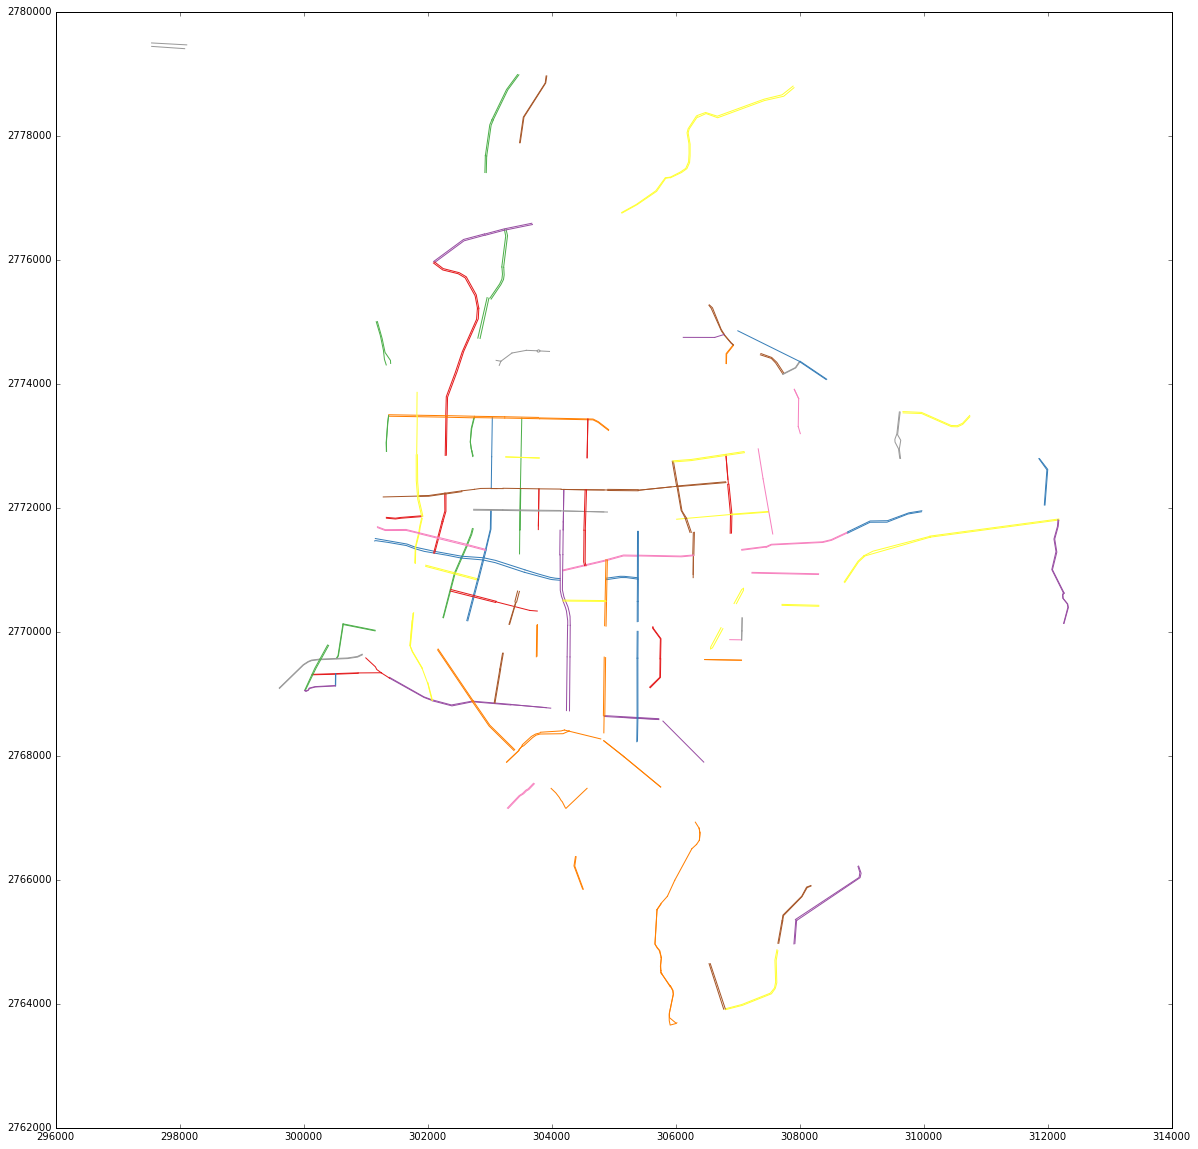

In [10]:
gpd.GeoSeries(two_way_section_data_df.groupby(by='name').apply(lambda t: t.unary_union)).plot()

In [41]:
merge_section_data_df = gpd.GeoDataFrame(two_way_section_data_df.groupby(by=['name', 'set']).first())

In [42]:
names = merge_section_data_df.reset_index(['name', 'set'])['name'].unique()

In [43]:
merge_section_data_df = merge_section_data_df.reset_index(['name', 'set'])

In [45]:
# for name in names:
#     merge_section_data_df[merge_section_data_df['name']==name].plot()

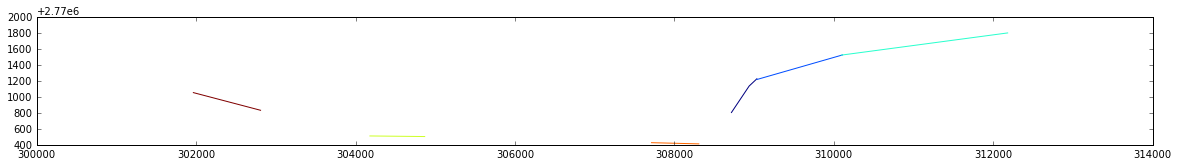

In [46]:
merge_section_data_df[merge_section_data_df['name']=='忠孝東西路'].plot()

In [158]:
忠孝東西路 = merge_section_data_df[merge_section_data_df['name']=='忠孝東西路'].copy()

In [159]:
def e_most(t):
    centroid = t.centroid
    x = centroid.apply(lambda t: t.x)
    return x.max()

def w_most(t):
    centroid = t.centroid
    x = centroid.apply(lambda t: t.x)
    return x.min()

In [160]:
def n_most(t):
    centroid = t.centroid
    y = centroid.apply(lambda t: t.y)
    return y.max()

def s_most(t):
    centroid = t.centroid
    y = centroid.apply(lambda t: t.y)
    return y.min()

In [161]:
width = e_most(忠孝東西路) - w_most(忠孝東西路) 
height = n_most(忠孝東西路) - s_most(忠孝東西路)

In [162]:
if width > height:
    忠孝東西路['pos_in_line'] = 忠孝東西路.centroid.apply(lambda t: t.x)

In [163]:
忠孝東西路['pos_in_line'] = 忠孝東西路['pos_in_line'] - 忠孝東西路['pos_in_line'].min()

In [164]:
忠孝東西路 = 忠孝東西路.sort_values(by='pos_in_line')

In [165]:
忠孝東西路 = 忠孝東西路.set_value(71, 'count', 10)

In [167]:
忠孝東西路[['pos_in_line', 'count']].set_index('pos_in_line').interpolate().reset_index('pos_in_line')

,pos_in_line,count
0,0.000000,10
1,2136.834252,2
2,5622.760673,2
3,6479.261349,2
4,7185.257598,2
5,8750.195735,2
